In [224]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/abrambeyer/openintro-possum")

Skipping, found downloaded files in ".\openintro-possum" (use force=True to force download)


In [225]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,root_mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [226]:
df = pd.read_csv("openintro-possum/possum.csv")
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [227]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    str    
 3   sex       104 non-null    str    
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), str(2)
memory usage: 11.5 KB


In [228]:
for col in df.columns:
    print(f"The unique values in {col} are: {df[col].unique()}")

The unique values in case are: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
The unique values in site are: [1 2 3 4 5 6 7]
The unique values in Pop are: <StringArray>
['Vic', 'other']
Length: 2, dtype: str
The unique values in sex are: <StringArray>
['m', 'f']
Length: 2, dtype: str
The unique values in age are: [ 8.  6.  2.  1.  9.  5.  3.  4.  7. nan]
The unique values in hdlngth are: [ 94.1  92.5  94.   93.2  91.5  93.1  95.3  94.8  93.4  91.8  93.3  94.9
  95.1  95.4  92.9  91.6  94.7  93.5  94.4  95.9  96.3  95.8  96.   90.5
  93.8  92.8  92.1  94.3  91.4  90.6  89.3  92.4  84.7  91.   88.4  85.3
  90.   85.1  

In [229]:
df.shape

(104, 14)

In [230]:
def sanitization(df):
    print("The number of null values in df are: \n")
    print(df.isnull().sum())
    print(f"Dublicated Rows:{df.duplicated().sum()}\n")
    obj = df.select_dtypes(include="object")
    cleaned = obj.apply(lambda x : x.str.strip().str.lower())
    print("Invalid Strings: \n")
    print(cleaned.isin(["na", "nan", "", "NA", "Na", "NAN","NaN"]).sum())
   

sanitization(df)

The number of null values in df are: 

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64
Dublicated Rows:0

Invalid Strings: 

Pop    0
sex    0
dtype: int64


C:\Users\noman\AppData\Local\Temp\ipykernel_21796\2082802790.py:5: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  obj = df.select_dtypes(include="object")


In [231]:
#dropping the missing values no need to fill them kinaki thorai amount ma cha

df = df.dropna(subset=['age', 'footlgth'])

In [232]:
#as we no site is stored as numbers but it is not a true numerical column so it should be handeled properly site is actually the location
df["site"] = df["site"].astype("str")
#case is also index like column which is also not needed for prediction
df=df.drop("case", axis=1)

In [233]:
df.info()

<class 'pandas.DataFrame'>
Index: 101 entries, 0 to 103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      101 non-null    str    
 1   Pop       101 non-null    str    
 2   sex       101 non-null    str    
 3   age       101 non-null    float64
 4   hdlngth   101 non-null    float64
 5   skullw    101 non-null    float64
 6   totlngth  101 non-null    float64
 7   taill     101 non-null    float64
 8   footlgth  101 non-null    float64
 9   earconch  101 non-null    float64
 10  eye       101 non-null    float64
 11  chest     101 non-null    float64
 12  belly     101 non-null    float64
dtypes: float64(10), str(3)
memory usage: 11.0 KB


In [234]:
cat_col = ["Pop", "sex", "site"]
num_col = df.drop(cat_col, axis=1).columns.to_list()
print(num_col)



['age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']


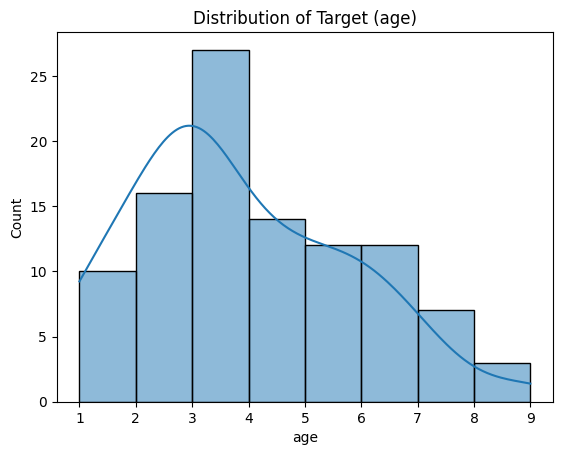

In [235]:
#target distribution
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Target (age)')
plt.show()

The target variable age is  right-skewed with most values between 2–5 years and few  outliers

In [236]:
corr = df[num_col].corr()


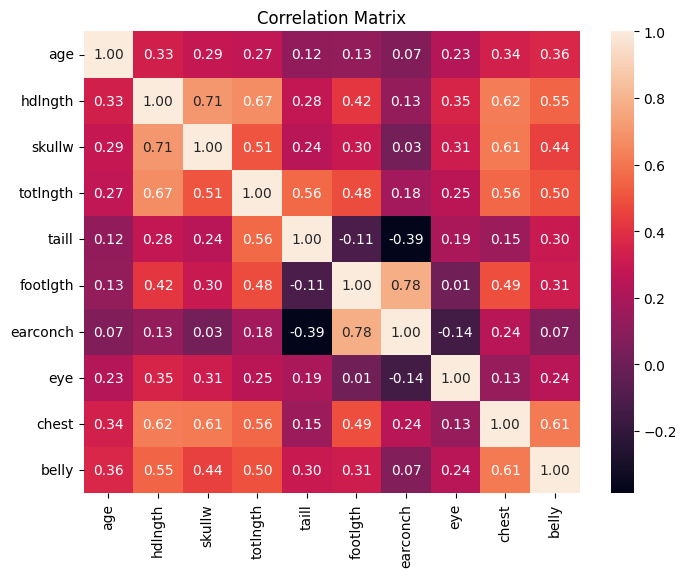

In [237]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

we can see here not single feature dominates our target column age and it is influened by almost all the features equally.

but we can see some high possibility of multicollinearity between some features

footlgth and earconch = 0.78

hdlngth and skullw = 0.71

hdlngth and totlngth = 0.67

chest and belly = 0.61

skullw and chest = 0.61



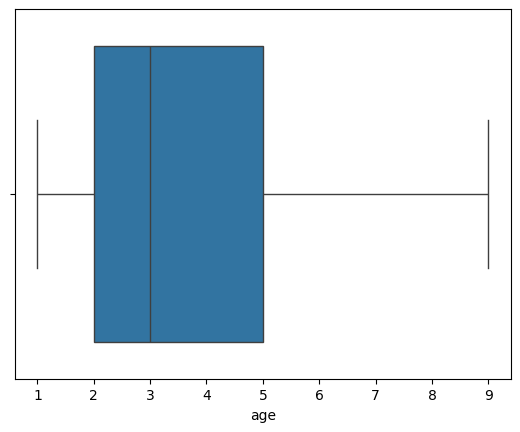

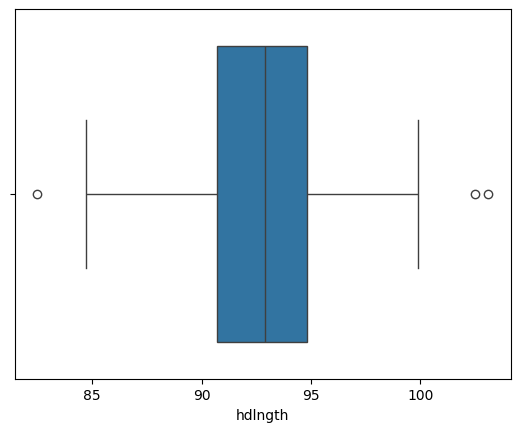

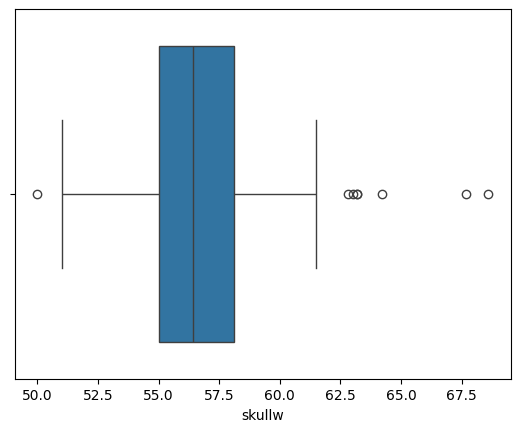

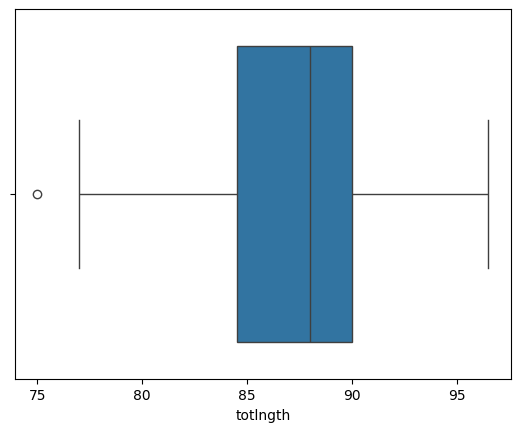

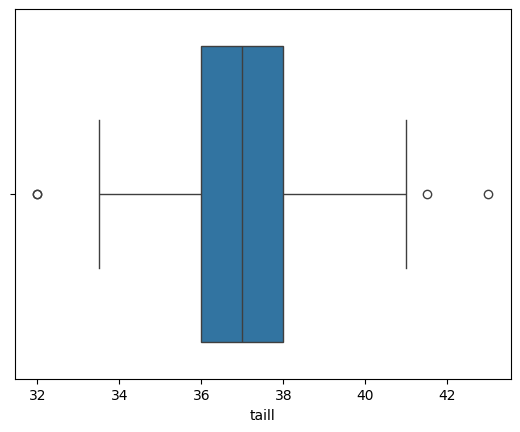

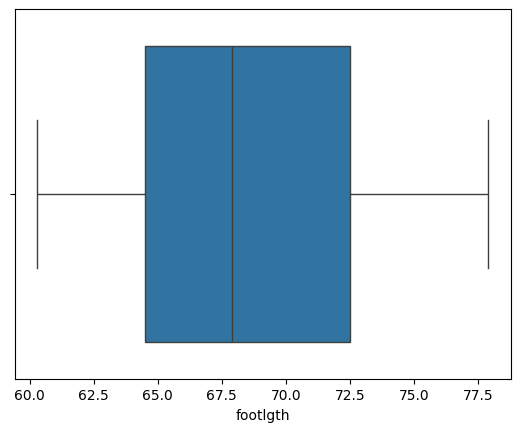

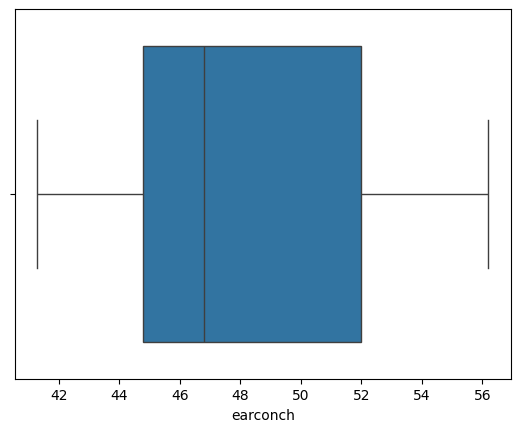

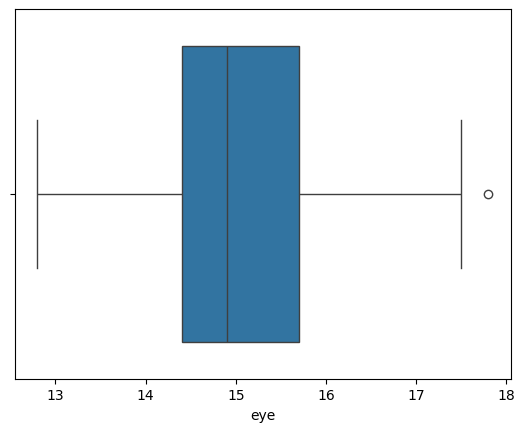

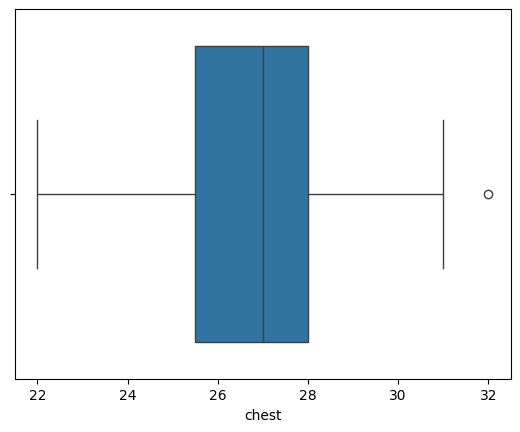

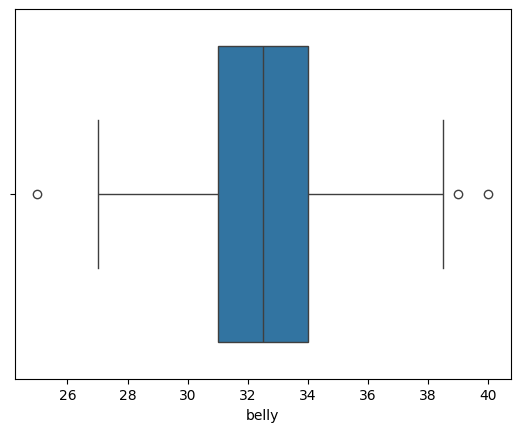

In [238]:
for col in num_col:
    sns.boxplot(x=df[col])
    plt.show()

We can see some outliers in some features like belly,chest,tail,eye,skullw,hdlngth.
So lets remove it

In [239]:
outlier_col = ["belly", "chest", "taill", "eye", "skullw", "hdlngth"]
Q1 = df[outlier_col].quantile(0.25)
Q3 = df[outlier_col].quantile(0.75)
IQR = Q3 - Q1
mask = ~((df[outlier_col] < (Q1 - 1.5 * IQR)) | (df[outlier_col] > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[mask]
print(df.shape)


(85, 13)


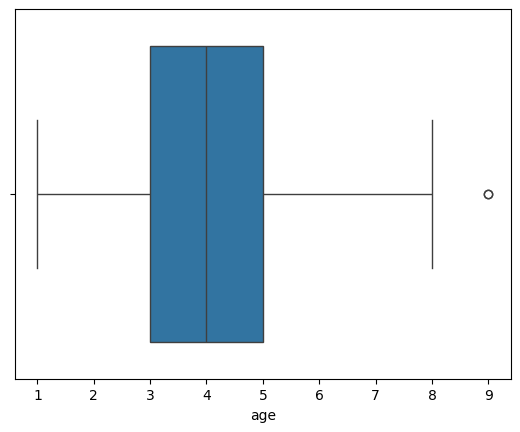

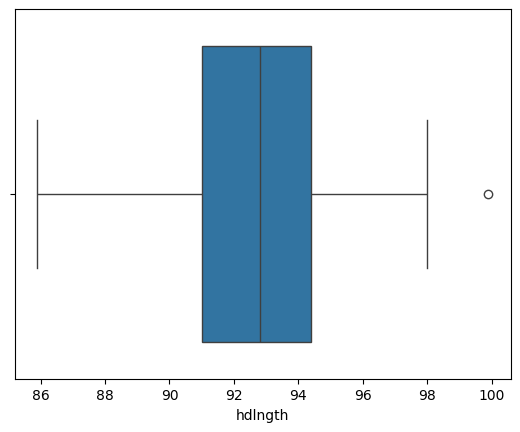

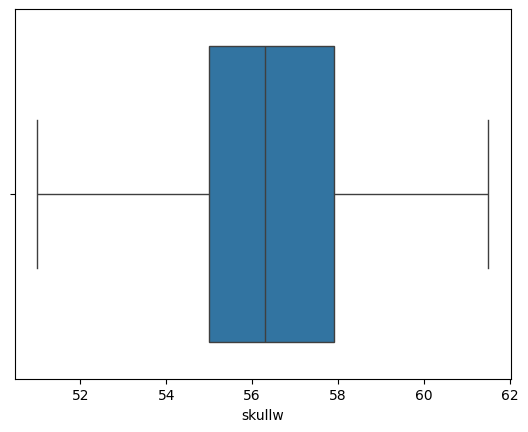

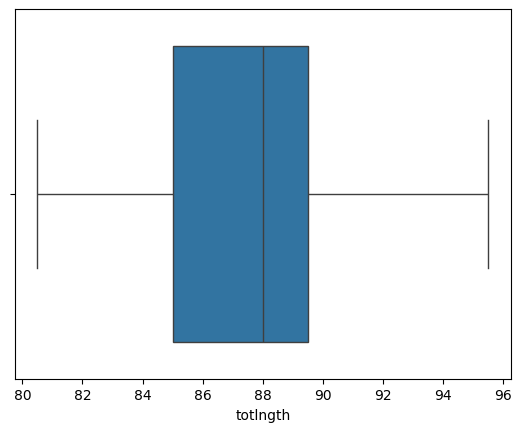

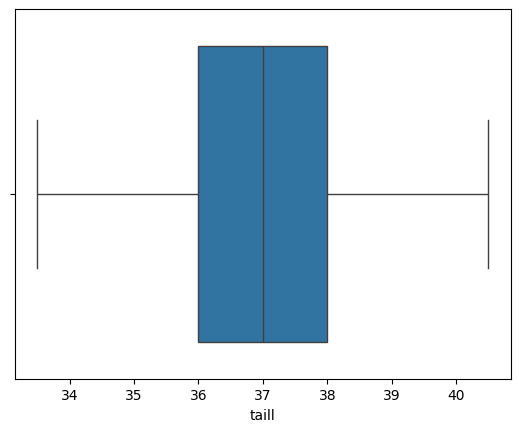

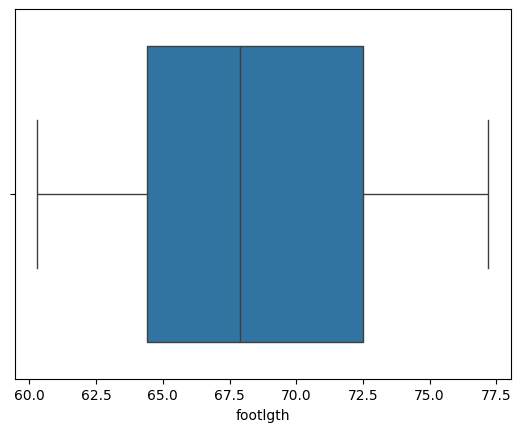

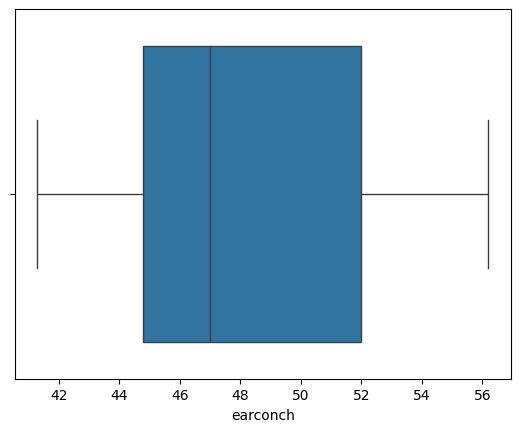

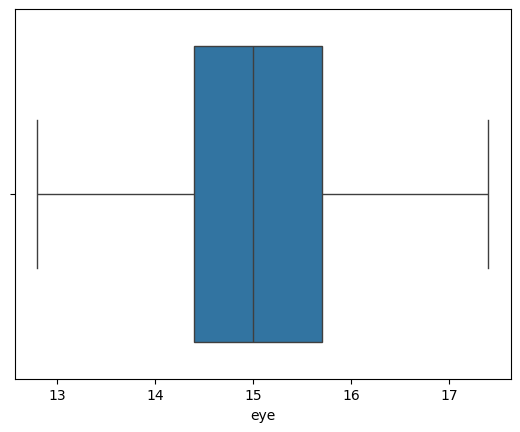

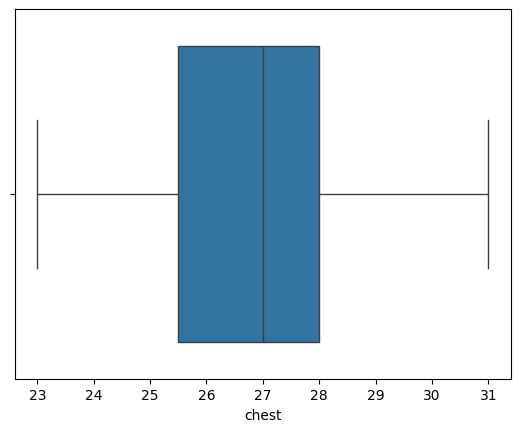

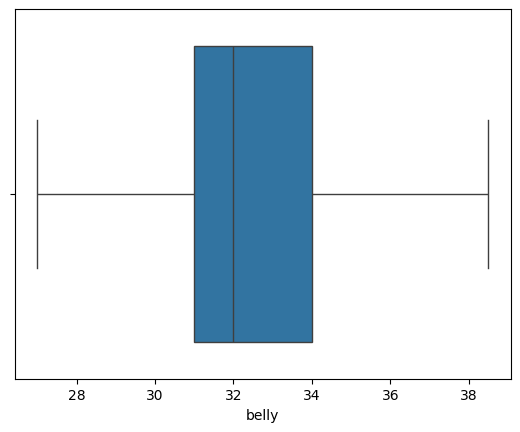

In [240]:
for col in num_col:
    sns.boxplot(x=df[col])
    plt.show()

In [241]:
#we can see some of the outliers are removed
df.shape

(85, 13)

In [242]:
X_features = df.drop(columns=['age'])
y_target = df['age']
num_features = [col for col in num_col if col != 'age'] 

In [244]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='if_binary'), cat_col)
    ]
)

df_preprocessed = preprocessor.fit_transform(X_features)
df_preprocessed

array([[ 0.53940635,  1.89623688,  0.48582802, ...,  0.        ,
         0.        ,  0.        ],
       [-0.04096757,  0.53729567,  1.18432907, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.50313298,  1.70210242,  2.30193075, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.07724094, -0.72457832,  0.48582802, ...,  0.        ,
         0.        ,  1.        ],
       [-0.40370127, -0.62751109, -1.3302747 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.3580395 ,  1.65356881,  0.48582802, ...,  0.        ,
         0.        ,  1.        ]], shape=(85, 18))

In [245]:
X_train, X_test, y_train, y_test = train_test_split(
    df_preprocessed, y_target, test_size=0.2, random_state=42
)

In [246]:
print(X_train.shape, X_test.shape, y_test.shape, y_train.shape)

(68, 18) (17, 18) (17,) (68,)


In [247]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [248]:
y_pred = model.predict(X_test)


In [249]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² score: {r2}")

Mean Squared Error (MSE): 5.649927904291554
Mean Absolute Error (MAE): 1.9150893441086003
Root Mean Squared Error (RMSE): 2.3769576993063115
R² score: -0.33838456093463876


we can see model performing very badly it is because age  was not stronly linearly correalted and dataset was too small with 85 rows only